In this lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

Use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best value.

Below is starert code which obtains demo data from Amazon Web Services website:

In [213]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

from sklearn.metrics import confusion_matrix

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

X = df[features]
y = df['high_quality']

# test_idx = np.random.uniform(0, 1, len(df)) <= 0.7
# train = df[test_idx==True]
# test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)
#X_train = train[features]
#X_test = test[features]
normalize_X_train = preprocessing.normalize(X_train)
normalize_X_test = preprocessing.normalize(X_test)

#y_test = test[y_column]
#y_train = train[y_column]

from sklearn.neighbors import KNeighborsClassifier

results = pd.DataFrame()

In [214]:
k = 1
mse_list = []
while k <= 50:
    # Create the knn model.
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model on the training data.
    knn.fit(normalize_X_train, y_train)
    # Make point predictions on the test set using the fit model.
    predictions = knn.predict(normalize_X_test)
    
    knn_score_result =  knn.score(normalize_X_test, y_test)
    
    mse_list.append([k, knn_score_result])
    #print "K", k, "Error", error
    
    k += 1
# Get the actual values for the test set.

#  results['predictions'+str(k)] = pd.Series(predictions)
    
#     error = (abs(results['predictions'+str(k)] - results['actual'])).sum()/results.shape[0]

# actual = test[y_column]
# actual.reset_index(inplace=True, drop=True)
# results['actual'] = actual
mse_df = pd.DataFrame(mse_list)


min_error = mse_df[1].min()
mse_df[mse_df[1] == min_error]

# from sklearn.metrics import confusion_matrix
# con_mat = confusion_matrix(actual, predictions, [0, 1])
# con_mat

,0,1
2,3,0.777436


In [215]:
knn_score_result

0.80205128205128207

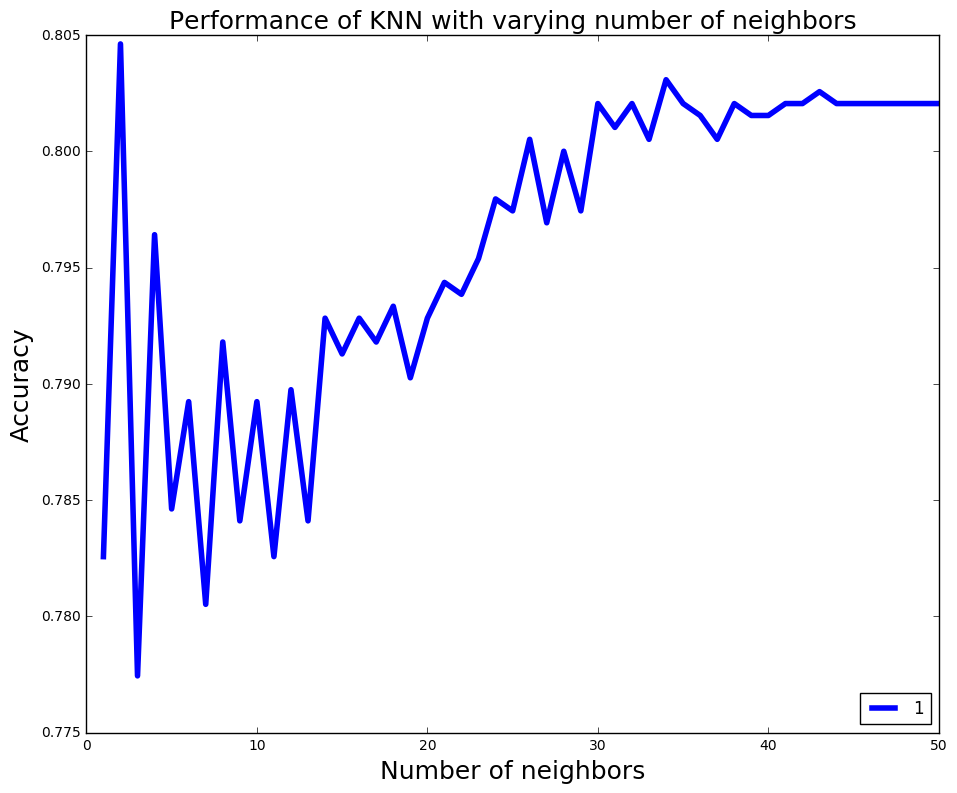

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

k = list(range(1,51))
plt.figure(figsize=[11,9])
plt.plot(k, mse_df[1], linewidth=4)
#plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 50.0])
#plt.ylim([0.805, 0.825])
plt.xlabel('Number of neighbors', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title('Performance of KNN with varying number of neighbors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [227]:
# Create the knn model.
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model on the training data.
knn.fit(normalize_X_train, y_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(normalize_X_test)

conmat = np.array(confusion_matrix(y_test, predictions, knn.classes_))
confusion = pd.DataFrame(conmat, index=knn.classes_,
                           columns=knn.classes_)

print(confusion)
print classification_report(y_test,predictions)

      0.0  1.0
0.0  1484   80
1.0   301   85
             precision    recall  f1-score   support

        0.0       0.83      0.95      0.89      1564
        1.0       0.52      0.22      0.31       386

avg / total       0.77      0.80      0.77      1950



In [210]:
min_error = mse_df[1].max()
mse_df[mse_df[1] == min_error]


,0,1
1,2,0.804615


In [211]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    # Assume points are tuples of ([x,y],label)
    return ((p[0]-q[0])**2 + (p[1]-q[1])**2) ** 0.5

import collections
labels = ['a','b','c','c']
print(collections.Counter(labels))

def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    #print(labels)
    vote = collections.Counter(labels).most_common(1)[0][0]
    return vote

def knn_classifier(labeled_points, new_point, k):
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    if k % 2 == 0:
        return "Must use odd k, to prevent ties"
    label_distances = []

    for p in labeled_points:
        #print(p[0], new_point)
        distance = calculate_distance(p[0],new_point)
        label_distances.append((distance,p[1]))
    
    label_distances.sort() # Put them in order
    #print(label_distances)
    prediction = neighbor_vote([label[1] for label in label_distances[:k]])
    return prediction

Counter({'c': 2, 'a': 1, 'b': 1})
